data downloading and loading

In [1]:
!apt-get update -y
!apt-get install -y p7zip-full


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,937 kB]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,271 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubunt

# Dataset

The authors of the paper released time aligned dataset, the feature columns include

#### Metadata

* `unix_time`: Timestamp in Unix epoch (seconds since Jan 1, 1970).
* `datetime`: unix_time converted to datetime format

#### Positional Features

* `Lm_eq_OP77Q_intxt`: McIlwain L-shell parameter (magnetic field line location).
* `ED_MLAT_OP77Q_intxt`: Magnetic latitude (MLAT).
* `ED_MLT_OP77Q_intxt_sin`, `ED_MLT_OP77Q_intxt_cos`: Sine and cosine of magnetic local time (MLT), used to encode circular data without discontinuity.
* `ED_R_OP77Q_intxt`: Radial distance (in Earth radii).

#### Geophysical Indices

* `flow_speed_t_0` ... `flow_speed_t_287`: Solar wind flow speed (km/s) at different time lags (t_279 means 279 steps back).
* `SYM-H_t_0` ... `SYM-H_t_287`: measures the symmetric disturbance of the horizontal magnetic field (H-component) at low-latitude ground magnetometers.
* `AE_INDEX_t_0` ... `AE_INDEX_t_287`: Auroral electrojet index, quantifies the strength of the eastward and westward auroral electrojets (currents flowing in the ionosphere around auroral latitudes).
* `Pressure_t_0` ... `Pressure_t_287`: Solar Wind Pressure parameter.
* `flow_speed_t_0` ... `flow_speed_t_287`: solar wind plasma flow velocity.

#### Target variable

* `eflux`: Electron flux (differential energy flux, measured in units like keV/(cm²·s·sr·keV)).

In [2]:
download_links = {
    "ch3.7z": "https://zenodo.org/records/6299967/files/ch3_data.7z?download=1",
    "ch11.7z": "https://zenodo.org/records/6299967/files/ch11_data.7z?download=1",
    "ch14.7z": "https://zenodo.org/records/6299967/files/ch14_data.7z?download=1",
    "ch16.7z": "https://zenodo.org/records/6299967/files/ch16_data.7z?download=1"
}

for filename, url in download_links.items():
  !wget -O "{filename}" "{url}"
  !7z x "{filename}"

  print(f"Finished with {filename}\n")

print("All required channel files have been downloaded and unzipped.")

--2025-08-17 08:00:43--  https://zenodo.org/records/6299967/files/ch3_data.7z?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47772151 (46M) [application/octet-stream]
Saving to: ‘ch3.7z’

ch3.7z              100%[===================>]  45.56M  4.30MB/s    in 42s     

2025-08-17 08:01:27 (1.07 MB/s) - ‘ch3.7z’ saved [47772151/47772151]


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 47772151 bytes (46 MiB)

Extracting archive: ch3.7z
--
Path = ch3.7z
Type = 7z
Physical Size = 47772151
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      2% - ch3_data.pkl        

In [3]:
channels = {
    '54 keV': 'ch3_data.pkl',
    '235 keV': 'ch11_data.pkl',
    '597 keV': 'ch14_data.pkl',
    '909 keV': 'ch16_data.pkl'
}

Data Preprocessing

In [4]:
import pandas as pd
import numpy as np

ch3

In [5]:
file_path = 'ch3_data.pkl'

In [6]:
df = pd.read_pickle(file_path)

The dataset has 1159 unique feature columns

In [7]:
df.dtypes

,0
unix_time,float32
Lm_eq_OP77Q_intxt,float32
ED_MLAT_OP77Q_intxt,float32
ED_MLT_OP77Q_intxt_sin,float32
ED_MLT_OP77Q_intxt_cos,float32
...,...
flow_speed_t_284,float32
flow_speed_t_285,float32
flow_speed_t_286,float32
flow_speed_t_287,float32


In [8]:
df['datetime'] = pd.to_datetime(df['unix_time'], unit='s') #to datetime conversion

In [9]:
df.set_index('datetime', inplace=True) #new index

In [10]:
df.sort_index(inplace=True) #sorting for splitting later


In [11]:
df.head(5)

,unix_time,Lm_eq_OP77Q_intxt,ED_MLAT_OP77Q_intxt,ED_MLT_OP77Q_intxt_sin,ED_MLT_OP77Q_intxt_cos,ED_R_OP77Q_intxt,AE_INDEX_t_0,AE_INDEX_t_1,AE_INDEX_t_2,AE_INDEX_t_3,...,flow_speed_t_279,flow_speed_t_280,flow_speed_t_281,flow_speed_t_282,flow_speed_t_283,flow_speed_t_284,flow_speed_t_285,flow_speed_t_286,flow_speed_t_287,eflux
datetime,,,,,,,,,,,,,,,,,,,,,
2012-09-02 00:00:00,1.346544e+09,1.26007,0.715324,-0.979217,-0.202818,1.284828,183.75,151.00,169.25,191.50,...,520.700012,529.674988,531.775024,536.974976,543.525024,545.725037,545.974976,535.250,527.199951,NaN
2012-09-02 00:00:00,1.346544e+09,1.82317,-7.915942,-0.576891,-0.816821,1.787119,183.75,151.00,169.25,191.50,...,520.700012,529.674988,531.775024,536.974976,543.525024,545.725037,545.974976,535.250,527.199951,NaN
2012-09-02 00:04:16,1.346544e+09,1.62604,-6.264870,-0.713122,-0.701040,1.614041,178.25,164.25,157.25,188.50,...,519.424988,527.650024,530.400024,537.750000,541.549988,545.075012,545.625000,539.625,527.824951,NaN
2012-09-02 00:04:16,1.346544e+09,1.20314,4.579703,-0.990125,0.140190,1.198547,178.25,164.25,157.25,188.50,...,519.424988,527.650024,530.400024,537.750000,541.549988,545.075012,545.625000,539.625,527.824951,NaN
2012-09-02 00:10:40,1.346545e+09,1.19303,8.210025,-0.864212,0.503128,1.172093,169.50,179.75,141.75,187.75,...,521.299988,524.474976,529.525024,535.775024,540.299988,544.125000,545.549988,542.000,530.699951,NaN


In [12]:
df['target'] = np.log10(df['eflux'] + 1) #log transformation to eflux column along with handling 0 by adding 1
y = df['target'] # setting target variable

In [13]:
positional_cols = [
    'ED_R_OP77Q_intxt',
    'ED_MLAT_OP77Q_intxt',
    'ED_MLT_OP77Q_intxt_sin',
    'ED_MLT_OP77Q_intxt_cos'
]

In [14]:
driver_cols = [col for col in df.columns if '_t_' in col] #all the features with the time-history suffix '_t_'
print(driver_cols)


['AE_INDEX_t_0', 'AE_INDEX_t_1', 'AE_INDEX_t_2', 'AE_INDEX_t_3', 'AE_INDEX_t_4', 'AE_INDEX_t_5', 'AE_INDEX_t_6', 'AE_INDEX_t_7', 'AE_INDEX_t_8', 'AE_INDEX_t_9', 'AE_INDEX_t_10', 'AE_INDEX_t_11', 'AE_INDEX_t_12', 'AE_INDEX_t_13', 'AE_INDEX_t_14', 'AE_INDEX_t_15', 'AE_INDEX_t_16', 'AE_INDEX_t_17', 'AE_INDEX_t_18', 'AE_INDEX_t_19', 'AE_INDEX_t_20', 'AE_INDEX_t_21', 'AE_INDEX_t_22', 'AE_INDEX_t_23', 'AE_INDEX_t_24', 'AE_INDEX_t_25', 'AE_INDEX_t_26', 'AE_INDEX_t_27', 'AE_INDEX_t_28', 'AE_INDEX_t_29', 'AE_INDEX_t_30', 'AE_INDEX_t_31', 'AE_INDEX_t_32', 'AE_INDEX_t_33', 'AE_INDEX_t_34', 'AE_INDEX_t_35', 'AE_INDEX_t_36', 'AE_INDEX_t_37', 'AE_INDEX_t_38', 'AE_INDEX_t_39', 'AE_INDEX_t_40', 'AE_INDEX_t_41', 'AE_INDEX_t_42', 'AE_INDEX_t_43', 'AE_INDEX_t_44', 'AE_INDEX_t_45', 'AE_INDEX_t_46', 'AE_INDEX_t_47', 'AE_INDEX_t_48', 'AE_INDEX_t_49', 'AE_INDEX_t_50', 'AE_INDEX_t_51', 'AE_INDEX_t_52', 'AE_INDEX_t_53', 'AE_INDEX_t_54', 'AE_INDEX_t_55', 'AE_INDEX_t_56', 'AE_INDEX_t_57', 'AE_INDEX_t_58', 'AE_IN

In [15]:
feature_cols = positional_cols + driver_cols
X = df[feature_cols] #input features

In [16]:
#verfication
expected_columns = len(positional_cols) + len(driver_cols)

actual_columns = X.shape[1]

if actual_columns == expected_columns:
    print("All colunns added")
else:
    print("mismatch")

All colunns added


In [17]:
full_data = pd.concat([X, y], axis=1)# to ensure we drop the same rows from both
print(full_data.isna().sum())


ED_R_OP77Q_intxt               0
ED_MLAT_OP77Q_intxt            0
ED_MLT_OP77Q_intxt_sin         0
ED_MLT_OP77Q_intxt_cos         0
AE_INDEX_t_0              122112
                           ...  
flow_speed_t_284          136278
flow_speed_t_285          136270
flow_speed_t_286          136262
flow_speed_t_287          136254
target                     20608
Length: 1157, dtype: int64


In [18]:
full_data.dropna(inplace=True) #drop na columns


y = full_data['target']
X = full_data.drop(columns=['target'])

In [19]:
#split periods

In [39]:
train_end_date = '2016-12-31'
val_start_date = '2017-01-01'
val_end_date = '2017-02-24'
storm_start_date = '2017-02-25'
storm_end_date = '2017-03-25'
# future_start_date = '2018-03-01'
# future_end_date = '2019-04-30'

In [23]:
#training set
X_train = X.loc[:train_end_date]
y_train = y.loc[:train_end_date]



In [28]:
#validation set

X_val = X.loc[val_start_date:val_end_date]
y_val = y.loc[val_start_date:val_end_date]


In [30]:
#storm period test set
X_test_storm = X.loc[storm_start_date:storm_end_date]
y_test_storm = y.loc[storm_start_date:storm_end_date]

In [35]:
# #future out of sample test set
# X_test_future = X.loc[future_start_date:future_end_date]
# y_test_future = y.loc[future_start_date:future_end_date]

In [40]:
print(f"Training set size:   {len(X_train)} samples")
print(f"Validation set size: {len(X_val)} samples")
print(f"Storm test set size: {len(X_test_storm)} samples")
# print(f"Future test set size: {len(X_test_future)} samples")

Training set size:   859988 samples
Validation set size: 31573 samples
Storm test set size: 16676 samples


In [38]:
print("Checking the time range of your data:")
print(f"First data point is on: {full_data.index.min()}")
print(f"Last data point is on:  {full_data.index.max()}")

Checking the time range of your data:
First data point is on: 2012-09-06 21:00:48
Last data point is on:  2018-02-01 00:00:00


In [41]:
#normalisation from the npy file ORIENT M code repo

In [42]:
avg_file = 'mageis_ch3_input_avg.npy'
std_file = 'mageis_ch3_input_std.npy'

# pre-computed mean and standard deviation
avg = np.load(avg_file)
std = np.load(std_file)

# Z-score normalization to all feature sets
X_train_norm = (X_train - avg) / std
X_val_norm = (X_val - avg) / std
X_test_storm_norm = (X_test_storm - avg) / std

print(X_train.head())
print(X_train_norm.head())

                     ED_R_OP77Q_intxt  ED_MLAT_OP77Q_intxt  \
datetime                                                     
2012-09-06 21:00:48          2.481845            -4.517538   
2012-09-06 21:05:04          2.311344            -4.208872   
2012-09-06 21:09:20          2.136864            -3.760756   
2012-09-06 21:15:44          1.959886            -3.125583   
2012-09-06 21:20:00          1.783007            -2.239918   

                     ED_MLT_OP77Q_intxt_sin  ED_MLT_OP77Q_intxt_cos  \
datetime                                                              
2012-09-06 21:00:48               -0.110873               -0.993835   
2012-09-06 21:05:04               -0.201171               -0.979556   
2012-09-06 21:09:20               -0.304121               -0.952634   
2012-09-06 21:15:44               -0.421331               -0.906907   
2012-09-06 21:20:00               -0.553296               -0.832985   

                     AE_INDEX_t_0  AE_INDEX_t_1  AE_INDEX_t_2  AE_I

Saving ch11 processed data

In [43]:
import os

output_dir = 'processed_data'
os.makedirs(output_dir, exist_ok=True)

# Save the normalized feature sets
X_train_norm.to_pickle(os.path.join(output_dir, 'X_train_norm.pkl'))
X_val_norm.to_pickle(os.path.join(output_dir, 'X_val_norm.pkl'))
X_test_storm_norm.to_pickle(os.path.join(output_dir, 'X_test_storm_norm.pkl'))

# Save the corresponding target sets
y_train.to_pickle(os.path.join(output_dir, 'y_train.pkl'))
y_val.to_pickle(os.path.join(output_dir, 'y_val.pkl'))
y_test_storm.to_pickle(os.path.join(output_dir, 'y_test_storm.pkl'))



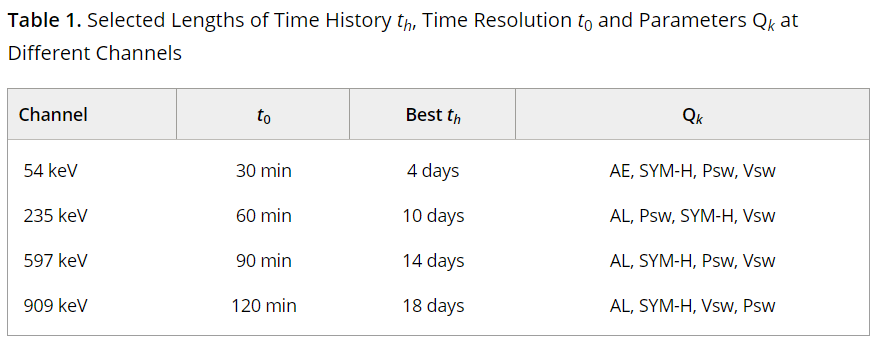

since we're on channel3 (54keV).
t0 is 30minutes. ie bin the rows into 30minute batches, features are averaged.
th is 4days, ie include the last 4 days of history for each predictor.

4days = 5760minutes
number of time lags = 5760 / 30 = 192
for each predictor (AE, SYM-H, Psw, Vsw) select columns from t_0 to t_191

In [ ]:
colmap = {
    "AE":      "AE"           if "AE" in df.columns else "AE_INDEX_t_0",
    "SYM_H":   "SYM_H"        if "SYM_H" in df.columns else "SYM_H_t_0",
    "Psw":     "pressure_dyn" if "pressure_dyn" in df.columns else "Psw_t_0",
    "Vsw":     "flow_speed"   if "flow_speed" in df.columns else "flow_speed_t_0",
    "eflux":   "eflux"        # assume this is 54 keV; if not, point to eflux_54keV
}

base = df[[colmap["AE"], colmap["SYM_H"], colmap["Psw"], colmap["Vsw"], colmap["eflux"]]].copy()
base.columns = ["AE", "SYM_H", "Psw", "Vsw", "eflux"]

# 2) Resample to 30-minute means
df30 = base.resample("30T").mean()

# 3) Create time-history lags for 4 days at 30-min resolution: 192 lags
MAX_LAG = 192
for name in ["AE", "SYM_H", "Psw", "Vsw"]:
    for k in range(MAX_LAG):  # 0..191 (t_0 is current)
        df30[f"{name}_t_{k}"] = df30[name].shift(k)

In [45]:
import shutil

# Zip the folder
shutil.make_archive("ch11_processed", 'zip', "ch11_processed")

# Download the zip
from google.colab import files
files.download("ch11_processed.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>